In [1]:
!pip install pandas numpy seaborn matplotlib textblob wordcloud


Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 624.3/624.3 kB 319.5 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 138.3 kB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud

In [3]:
# Load the dataset
file_path = "D:\\prodigy task\\task 4\\twitter_training.csv"
df = pd.read_csv(file_path, header=None)



In [4]:
# Inspect the dataset
df.head()



,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
# Assign proper column names (based on Kaggle dataset structure)
df.columns = ["ID", "Entity", "Sentiment", "Tweet"]



In [7]:
# Drop unnecessary columns
df = df[["Sentiment", "Tweet"]]

# Check for missing values
df.isnull().sum()

# Drop missing values if any
df.dropna(inplace=True)



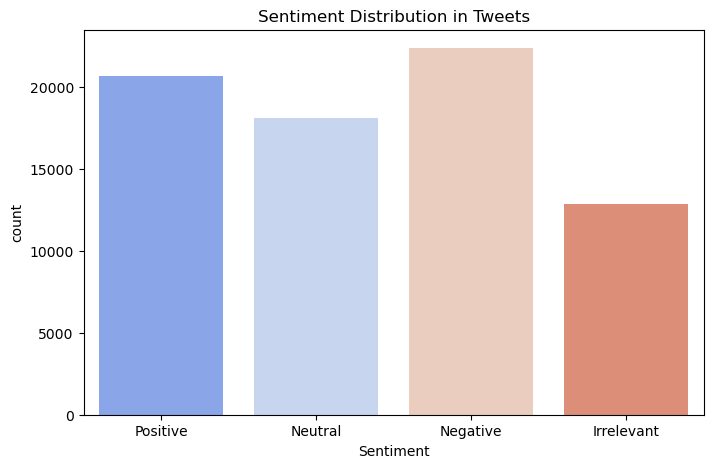

In [8]:
# Basic sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Sentiment", palette="coolwarm")
plt.title("Sentiment Distribution in Tweets")
plt.show()



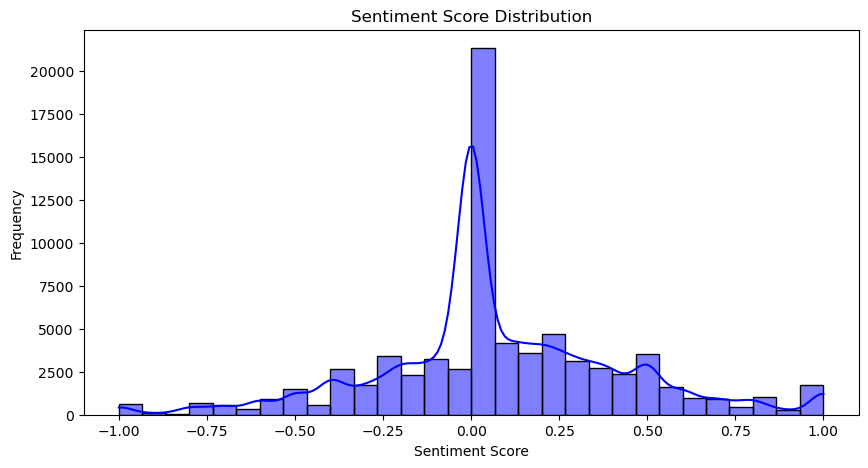

In [9]:
# Sentiment Analysis using TextBlob
def get_sentiment_score(text):
    return TextBlob(text).sentiment.polarity

df["Sentiment_Score"] = df["Tweet"].apply(get_sentiment_score)

# Visualizing Sentiment Score Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["Sentiment_Score"], bins=30, kde=True, color="blue")
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()



In [10]:
# WordCloud for Positive and Negative Sentiments
positive_tweets = " ".join(df[df["Sentiment"] == "Positive"]["Tweet"])
negative_tweets = " ".join(df[df["Sentiment"] == "Negative"]["Tweet"])



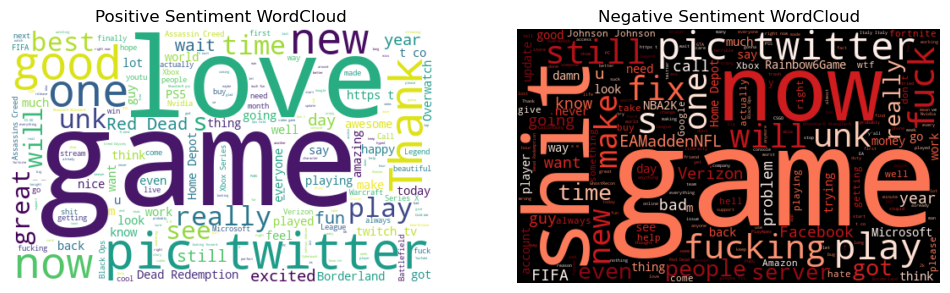

In [11]:
# Generate WordClouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(width=500, height=300, background_color="white").generate(positive_tweets)
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Sentiment WordCloud")

plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(width=500, height=300, background_color="black", colormap="Reds").generate(negative_tweets)
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Sentiment WordCloud")

plt.show()
